# Mapas Auto-Organizáveis(SOM) - Agrupamento

In [2]:
import pandas as pd
from minisom import MiniSom

## Obter os dados

In [3]:
base = pd.read_csv("wines.csv")

In [4]:
base.head(2)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


## Divisão dos dados

In [5]:
# Como é um problema de agrupamento não-supervisionado apenas não se vai utilizar a variavel Class.
X = base.drop(["Class"] , axis=1)

In [6]:
X.shape

(178, 13)

In [7]:
X.head(2)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [8]:
y = base["Class"]

In [9]:
y.head(2)

0    1
1    1
Name: Class, dtype: int64

In [10]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

## Pré-Processamento dos dados- Normalização das Variaveis

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Passar os dados de entrada para uma escala de 0 a 1 para que o processamento dos dados seja mais rapido e tambem para não 
# haver variaveis que pela sua escala tenham mais influência no modelo(para não haver variáveis dominantes).
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
# Ajustar a variavel X para fazer a sua normalização.
scaler.fit(X)

C:\Users\Bruno\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
# Normalização da variavel X.
X = scaler.transform(X)

## Modelo do Mapa Auto-Organizável

In [15]:
# Algoritmo utilizado para agrupamento(como o k-means) que utiliza redes neurais. Tambem pode ser utilizado para redução de
# dimensionalidade

# Tem uma camada de entrada(com os atributos de entrada) directamente ligada a camada de saida. Cada neuronio da camada
# de entrada está directamente ligado a todos os neuronios da camada de saida(rede neural densa). A camada  de saida é uma 
# matriz.

# Calculo do tamanho da matriz de saida (SOM-self organizing map):5xsqr(N), sendo N o nº de registros.
# Por exemplo para 178 registros: 5xsqr(178) = 65,65 celulas = matriz 8x8.

# A diferença para as redes neurais tradicionais reside no facto de não haverem cadamas ocultas nem se utilizar funções de 
# activação, nem se multiplicam os valores de entrada pelos pesos.
# Nos mapas auto organizáveis os pesos representam o valor do atributo da camada de entrada.
# por exemplo: 
# 1º registro: idade:21, salario: 1800
# 2 registro: idadde:20, salario: 1500
# Os pesos apenas representam nós. Por exemplo numa camada de entrada com 2 atributos. No nó 1(neuronio 1) da camada de saida
# tem-se o valor do peso 1, relacionado com o 1º atributo do 1º registro e o valor do peso 2, relacionado com o 2º atributo do
# 1º registro. Nó 1: (P1,1:P1,2). 
# No nó 2(neuronio 2) da camada de saida tem-se o valor do peso 1, relacionado com o 1º atributo do 2º registro e o valor do 
# peso 2, relacionado com o 2º atributo do 2º registro. Nó 2: (P2,1:P2,2).

# 1º)----------------------------------------------------------------------------------------
# Os nós sao inicializados aleatoriamente: pr ex. Nó 1: (30,3000) e Nó 2: (15,1000).
# Calcula-se a distancia eucladiana entre cada registro da base de dados e cada nó inicializado aleatoriamente(como no k-means
# com os registros da base de dados a funcionar de centrides).
# Para o 1º registro e nó 1: sqr(21-30)^2+(1800-3000)^2=0.22
# Para o 1º registro e nó 2: sqr(21-15)^2+(1800-1000)^2=0.10
# Para o 2º registro e nó 1: sqr(20-30)^2+(1500-3000)^2
# Para o 2º registro e nó 2: sqr(20-15)^2+(1500-1000)^2

# 2º)----------------------------------------------------------------------------------------------------------
# Selecciona-se o nó(ponto) que está mais proximo(mais semelhante) de cada registro e atribui-se o nome de BMU-best match unit
# Para o 1º registro seria o nó 2(distancia de 0.10).

# 3º)---------------------------------------------------------------------------------------------------------
# De seguida para os nós que não forem escolhidos para BMU cacula-se a distancia eucladiana entre esse nó e os BMU existentes. 
# Considera-se que esse nó pertence ao agrupamento do BMU que estiver mais proximo.

# Um registro da base de dados pode estar associado a somente um BMU, mas um BMU pode estar associado a vários registros

# 4º)---------------------------------------------------------------------------------------------------------------
# A aprendizagem do modelo é feita aproximando o valor dos BMU dos registros de entrada(inicialmente os valores dos BMU foram
# obtidos através da inicialização aleatoria dos pesos).
# Ao se aproximar os valores dos BMU aos registros de entrada , tambem se está a aproximar os nós restantes (que não foram 
# escolhidos para BMU) aos seus valores de entrada.

# Esta aproximação entre o BMU e o registro é feita obtendo a diferença entre os dois valores e incrementando uma parcela desta
# diferença no BMU ponderada por um fator chamado de taxa de aprendizagem que tem como objectivo suavizar o processo de ajuste 
# dos neurônios nos dados. Obtem-se assim o novo valor do nó para os BMU.
# n,novo = n+a*(d-n)
# Onde: 
# n,novo: é o novo valor neurónio do BMU
# n: é o valor do neuronio do BMU
# a: taxa de aprendizagem
# d: registro
# n: neuronio BMU

# Se a=0.5, n,novo = (n+d)/2. A nova posição de n é a media da sua antiga posição com a posição do registro.
# Se a=1, n,novo=d. A nova posição de n é a mesma possição do registro.

# 5º)------------------------------------------------------------------------------------------------------------------
# De seguida também os pontos vizinhos são aproximados do BMU. Na atualização dos vizinhos será considerado mais um fator de 
# ponderação descrito por uma função chamada função de vizinhança, que produzirá valores menores quando o BMU e o neuronio 
# vizinho forem mais distantes no espaço matricial (látice). Obtem-se o novo valor do nó para os pontos vizinhos dos BMU.

# Na maioria dos casos ainda existe mais um parâmetro destas funções que é o raio que aumenta ou diminui os valores da função
# de vizinhança.

# n,novo = nv,novo = nv+a*(nBMU, nv)a*(d-nv)
# Onde: 
# nv,novo: é o novo valor do neurónio de vizinhança
# nv: é o valor do neuronio de vizinhança
# a*(nBMU, nv): função de vizinhança
# a: taxa de aprendizagem
# d: registro
# n: neuronio de vizinhança

# 6º)------------------------------------------------------------------------------------------------------------------------
# De seguida volta-se a repetir os passos iterativamente começando por calcular a distancia eucladiana entre cada registro da 
# base de dados e cada nó(com os valores dos nós obtidos na iteração anterior).
# No número de epocas define-se quantas vezes se vai fazer o ajuste dos pesos.

# Inicializar os pesos, criar os nós para cada célula/neurônio, calcular a distância de cada registro para nó e escolher o 
# neurônio BMU. De seguida trazer os neurônios para mais perto da camada de entrada.

#------------------------------------------------------------------------------------------------------------------------------
# x: numero de linhas da matriz de saida
# y: numero de colunas da matriz de saida
# input_ten: numero de variaveis de entrada
# sigma: Alcançe do raio traçado com o centro nos BMU e utilizado para a actualização dos seus vizinhos. 
# learning_rate: taxa de aprendizagem utilizada para a actualização do BMU e aproximação do seu valor ao valor do registro (e
# consequente actualização dos valores vizinhos).
# random_seed: Obter sempre o mesmo resultado para o modelo. A inicialização dos pesos tem sempre o mesmo valor.

# ransom_weights_init: Inicialização dos pesos da base de dados
# train_random: Treinar o modelo (num_iteration = número de epocas)


model = MiniSom(x=8, y=8, input_len=13, sigma=1, learning_rate=0.5, random_seed=2)
model.random_weights_init(X)
model.train_random(data=X, num_iteration=100)

In [16]:
# Pesos do modelo
# 832 pesos
model._weights

array([[[0.69716149, 0.21460463, 0.60149763, 0.37662437, 0.34197589,
         0.70656761, 0.59058384, 0.4177878 , 0.55295134, 0.34556729,
         0.59542857, 0.65019771, 0.57136806],
        [0.7726402 , 0.30966936, 0.57369301, 0.35737434, 0.3641168 ,
         0.65972661, 0.56611775, 0.33971509, 0.52344021, 0.35007362,
         0.48229736, 0.67074591, 0.57805005],
        [0.65950019, 0.28013973, 0.61054095, 0.39770058, 0.37674389,
         0.55744829, 0.4525994 , 0.42489874, 0.45126839, 0.29814223,
         0.44370938, 0.60352009, 0.47271412],
        [0.52751279, 0.36655544, 0.73740293, 0.58142833, 0.42930012,
         0.54630863, 0.5235049 , 0.47588938, 0.44357238, 0.26419441,
         0.43858028, 0.6776546 , 0.34908052],
        [0.57906345, 0.45779776, 0.66743599, 0.56730682, 0.36250116,
         0.43041549, 0.35491897, 0.54451787, 0.40457222, 0.29214094,
         0.3848655 , 0.51226712, 0.30468309],
        [0.62677491, 0.52017645, 0.61398718, 0.58811459, 0.29332693,
         0.

In [17]:
# Mapa Auto-Organizável 8x8
model._activation_map

array([[1.11646528, 1.23743738, 1.08212561, 1.00218461, 1.02784448,
        1.29189662, 1.46606957, 1.49103863],
       [1.36117948, 1.29524356, 1.20484356, 1.07671587, 1.03390165,
        1.30226438, 1.46274167, 1.4197695 ],
       [1.30187762, 1.31882689, 1.25577627, 1.12538481, 1.00906212,
        1.18818251, 1.33671167, 1.28577558],
       [1.21486118, 1.21101705, 1.07484159, 0.91286769, 0.87241104,
        0.97702509, 1.09203637, 1.11828819],
       [1.12188365, 1.0043121 , 0.84340028, 0.74517691, 0.70381468,
        0.74993317, 0.85847553, 0.950582  ],
       [0.87420318, 0.87162944, 0.81512137, 0.73770767, 0.66230602,
        0.6707701 , 0.74803096, 0.89880376],
       [0.98556109, 0.93364296, 0.86202691, 0.8010015 , 0.68445031,
        0.64903043, 0.70926314, 0.84699485],
       [0.86842213, 0.89064627, 0.96438437, 0.88705546, 0.75556676,
        0.75715514, 0.72129982, 0.81020137]])

In [18]:
# Quantas vezes cada um dos neurónios foram escolhidos como BMU.
# O neurónio na possição (0,0) foi considerado 5 vezes como BMU.
a=model.activation_response(X)

In [19]:
a

array([[ 5.,  3.,  5.,  4.,  0.,  0.,  5.,  9.],
       [ 7.,  2.,  2.,  1.,  3.,  0.,  7.,  3.],
       [ 7.,  9.,  2.,  2.,  1.,  2.,  9., 12.],
       [ 5.,  5.,  2.,  1.,  0.,  0.,  1.,  1.],
       [ 0.,  1.,  4.,  3.,  0.,  2.,  1.,  3.],
       [ 2.,  2.,  2.,  2.,  0.,  3.,  0.,  2.],
       [ 0.,  3.,  1.,  3.,  1.,  4.,  0.,  2.],
       [ 4.,  4.,  1.,  0.,  3.,  6.,  1.,  3.]])

## Visualização dos resultados

In [20]:
from pylab import pcolor, colorbar, plot

### Mapa da distância entre neurónios

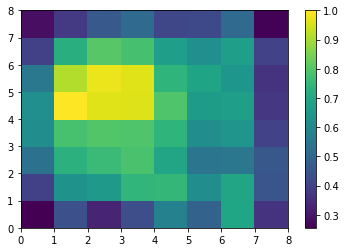

In [21]:
# distance_map().T: Matriz transposta com os valores de distancia MID.
# MID: Média da distancia eucladiana entre um neurónio e os neurónios à sua volta.

# MID - mean inter neuron distance: usada para avaliar quanto um neurónio é parecido aos seus vizinhos.

# Quanto maior o valor da distancia, maior a diferença entre o neurónio e os seus vizinhos
# Como se está a utilizar valores entre 0 e 1. 1 é a maxima distancia possivel e 0 é a minima distancia possivel.

# Quanto mais escuro(azul) menor é a distancia do neurónio para os vizinhos(o neurónio é mais semelhante aos vizinhos).
# Usado para avaliar se um detrminado registro se enquadra no padrão. Por exemplo os neurónios amarelos não são tão confiaveis
# por serem muito diferentes aos neurónios vizinhos. 
pcolor(model.distance_map().T)
colorbar()

## Mapa Auto-Organizável

In [22]:
# Posição 1 dos dados de entrada(Linha 1 dos dados de entrada).
X[2]

array([0.56052632, 0.3201581 , 0.70053476, 0.41237113, 0.33695652,
       0.62758621, 0.61181435, 0.32075472, 0.75709779, 0.37542662,
       0.44715447, 0.6959707 , 0.64693295])

In [23]:
# Neurónio BMU para a posição 1
w = model.winner(X[2])
w

(0, 0)

In [24]:
# Lista com os marcadores
# "o" neurónio pertence à classe 0
# "s" neurónio pertence à classe 1
# "d" neurónio pertence à classe 2
markers = ["o","s","d"]

In [25]:
# Lista com as cores
colors = ["r","g","b"]

In [26]:
# Para se poder associar os marcadores e as cores à variavel y tem de se alterar o nome dos registros, porque a lista dos
# marcadores e cores começam no indice 0.
y[y==1] = 0
y[y==2] = 1
y[y==3] = 2

C:\Users\Bruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Bruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Bruno\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [27]:
y.value_counts()

1    71
0    59
2    48
Name: Class, dtype: int64

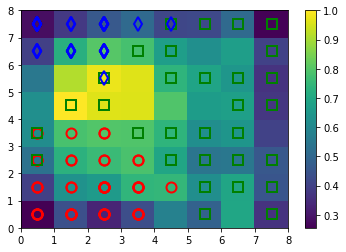

In [28]:
# i: indice de X
# x: linha inteira de X
# w: BMU de cada linha

# (+0.5)posicionar o simblo no meio do neurónio

pcolor(model.distance_map().T)
colorbar()

for i,x in enumerate(X):
    #print(i)
    #print(x)
    w = model.winner(x)
    #print(w)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]], markerfacecolor="None", 
    markersize=10, markeredgecolor=colors[y[i]], markeredgewidth=2) 